**Exercise 1**

In [1]:
import pandas as pd

mnist = pd.read_csv("mnist_784.csv")

In [2]:
mnist

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [3]:
mnist['class']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

In [4]:
features = mnist.loc[:, mnist.columns != 'class']

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
features2D = pca.fit_transform(features)

In [6]:
features2D

array([[ 122.25012939, -316.18253538],
       [1010.49124753, -289.94739299],
       [ -58.99528429,  393.70737407],
       ...,
       [-271.50489049,  590.0716625 ],
       [-310.21669643, -116.78582469],
       [1058.85769248,  -83.37337832]])

In [7]:
pca.explained_variance_ratio_

array([0.09746116, 0.07155445])

In [8]:
from matplotlib import pyplot as plt
import numpy as np

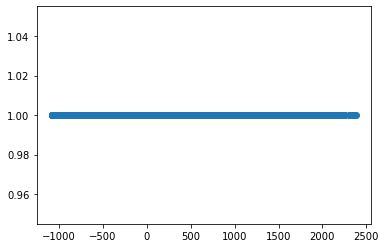

In [9]:
fst_pca = features2D[:,0]
plt.scatter(fst_pca, np.repeat(1,len(fst_pca)))
plt.show()

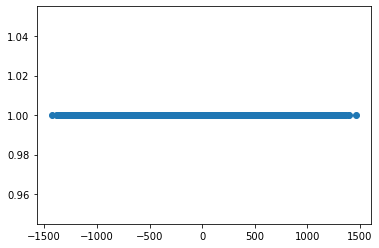

In [10]:
snd_pca = features2D[:,1]
plt.scatter(snd_pca, np.repeat(1,len(snd_pca)))
plt.show()

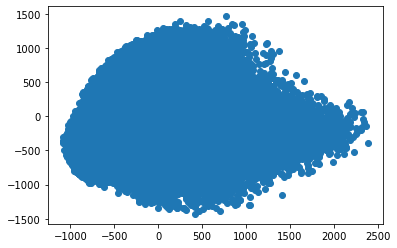

In [11]:
plt.scatter(features2D[:,0], features2D[:,1])
plt.show()

In [12]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for batch in np.array_split(features.values,n_batches):
    inc_pca.partial_fit(batch)

features_reduced = inc_pca.transform(features)    

In [13]:
features_reduced

array([[ 122.25500694,  316.23364499,   51.13178161, ...,   79.54978737,
          70.81789108,    9.17132981],
       [1010.49445865,  289.96446993, -576.12081754, ...,   24.44785951,
         -50.0768693 ,   39.40749108],
       [ -58.99599856, -393.69804681,  161.99724511, ...,   56.43654621,
         -87.9226803 ,  -17.8323958 ],
       ...,
       [-271.50686236, -590.07806446, -341.36905325, ...,  -46.64576339,
          35.14735446,  -25.86730048],
       [-310.22486483,  116.72752672, -635.71984162, ...,  -42.34733241,
         -46.03059498,  -19.6249888 ],
       [1058.86192623,   83.39244069, -731.34206351, ...,  -54.49489283,
         -89.19509602,  -24.05562367]])

In [14]:
features.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

**Exercise 2**

In [15]:
from sklearn.datasets import make_swiss_roll
roll, color = make_swiss_roll(2000)

In [16]:
roll

array([[  8.43785898,  19.70692907,  10.48633607],
       [ -6.96950866,  14.6091526 ,   5.32699742],
       [  7.57182026,   2.37282801,  -8.91880968],
       ...,
       [ 12.60135739,   1.56699487,   0.65744928],
       [ -3.51436294,  17.60677518, -10.06361299],
       [ -5.2518129 ,   5.03402442,  -9.05770543]])

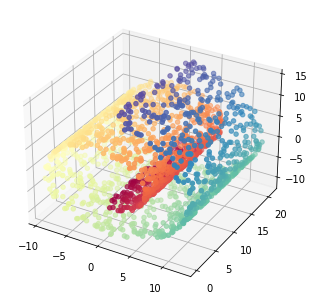

In [17]:
import mpl_toolkits.mplot3d.axes3d as p3

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.scatter(roll[:,0],roll[:,1],roll[:,2],c=color,cmap=plt.cm.Spectral)
plt.show()

In [18]:
from sklearn.decomposition import KernelPCA

In [19]:
rbf = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
reduced_rbf = rbf.fit_transform(roll)

In [20]:
linear = KernelPCA(n_components=2, kernel="linear")
reduced_linear = linear.fit_transform(roll)

In [21]:
sigmoid = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001)
reduced_sigmoid = sigmoid.fit_transform(roll)

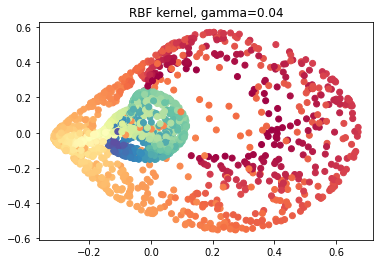

In [22]:
plt.scatter(reduced_rbf[:,0],reduced_rbf[:,1],c=color,cmap=plt.cm.Spectral)
plt.title("RBF kernel, gamma=0.04")
plt.show()

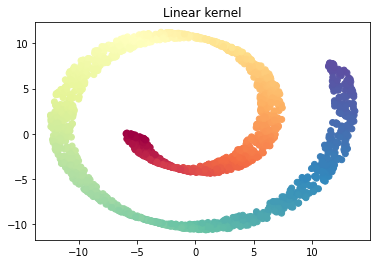

In [23]:
plt.scatter(reduced_linear[:,0],reduced_linear[:,1],c=color,cmap=plt.cm.Spectral)
plt.title("Linear kernel")
plt.show()

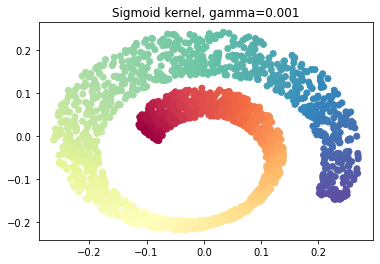

In [24]:
plt.scatter(reduced_sigmoid[:,0],reduced_sigmoid[:,1],c=color,cmap=plt.cm.Spectral)
plt.title("Sigmoid kernel, gamma=0.001")
plt.show()

In [25]:
space,_ = make_swiss_roll(2000,noise=10)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

labeled_roll = np.column_stack((roll,np.repeat(1,len(roll))))
labeled_space = np.column_stack((space,np.repeat(0,len(space))))
data = np.concatenate((labeled_roll,labeled_space))
data_train, data_test = train_test_split(data,train_size=0.67, shuffle=True)

X_train = data_train[:,[0,1,2]]
y_train = data_train[:,3]

X_test = data_test[:,[0,1,2]]
y_test = data_test[:,3]

clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("logistic", LogisticRegression())
])

param_grid = [{
    "kpca__gamma": list(np.linspace(0.001,0.05,10)),
    "kpca__kernel": ["rbf", "sigmoid", "linear"]
}]

grid_search = GridSearchCV(clf,param_grid, cv=3)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('logistic', LogisticRegression())]),
             param_grid=[{'kpca__gamma': [0.001, 0.0064444444444444445,
                                          0.01188888888888889,
                                          0.017333333333333333,
                                          0.02277777777777778,
                                          0.028222222222222225,
                                          0.033666666666666664,
                                          0.03911111111111111,
                                          0.04455555555555556, 0.05],
                          'kpca__kernel': ['rbf', 'sigmoid', 'linear']}])

In [27]:
grid_search.best_params_

{'kpca__gamma': 0.02277777777777778, 'kpca__kernel': 'rbf'}

In [28]:
model = grid_search.best_estimator_

In [29]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.6772727272727272

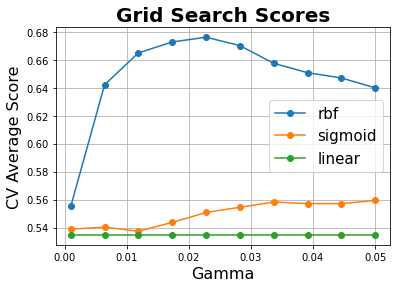

In [30]:
results = grid_search.cv_results_
scores = results['mean_test_score']
params = results['params']
lines = {
    'rbf' : [],
    'sigmoid': [],
    'linear': []
}
for idx,p in enumerate(params):
    lines[p['kpca__kernel']].append((p['kpca__gamma'],scores[idx]))

_, ax = plt.subplots(1, 1)    
for v in lines.keys():
    arr = np.array(lines[v])
    ax.plot(arr[:,0], arr[:, 1], '-o', label=v)

ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
ax.set_xlabel("Gamma", fontsize=16)
ax.set_ylabel('CV Average Score', fontsize=16)
ax.legend(loc="best", fontsize=15)
ax.grid('on')        
plt.show()